## Business Data Analytics and Prediction
*Dr. Gilli Shama*

## Lesson 1.2 End to End Project in Python: Attrition prediction

Before we start. It is a common practice in Python to have all imports on the top. All packages below are very common in machine learning and you have installed them already as part of Anaconda.

In [1]:
import pandas as pd 
#pandas handle data frames, including reading of a csv or excel . To run any command from pandas type "pd." and command name

import numpy as np  
#numpy handles arrays, it is required as inputs to sklearn, and work in numpy is much faster than pandas.

import matplotlib.pyplot as plt 
# Matplot is the most popular tool for data visualization.

%matplotlib inline 
# In Jupyter, to see the plots on the execution lines use the magic command of %matplotlib inline.


# sklearn (Sci Kit Learn) includes many machine learning commands. Import what you need from it.
from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier        # This is the selected model in this example


### 1. Business objectives and targets

**Business objective: ** Identify employees that may leave the company, to e under the scope of preventive and mitigation actions.

** Machine Learning target: ** Classify employees that will leave the company.

### 2. Read, explore and prepare data

#### 2.1. Download and read the data

The business analytics concepts and code will be demonstrated on HR data of employees attrition, evaluation and satisfaction: https://www.kaggle.com/ludobenistant/hr-analytics

Steps:

1. Download the csv file from the link above, to your local folder, under a folder called Data.
2. Look on the file.
3. Read the file to a data frame, as below:

Notes to the command below:
* Change the file to your downloaded location and name
* If you are working in windows, then on the file path you need to change from "\" to "/".
* If you saved the data as a csv file, then use the pd.read_csv command to read an Excel use pd.read_excel

In [2]:
df = pd.read_csv("../Data/HR_comma_sep.csv") 
# df = pd.read_excel("C:/Users/gillis/Documents/_Personal/IDC/Business_Data_Analytics2018/Data/HR_comma_sep.xlsx")  

#### 2.2. Take a quick look on the data structure

After reading the file you can view it by running the data name: df. However, this will display all data, which is very long.
Instead use the functions: 
* head
* info 
* describe

Check:
1. What is your prediction target (which column is y)?
2. Is there data that needs to be manipulted? (for example, change string to number, do a calculation, or split a string)
3. Is there missing data? How to handle it? (for example, delete rows or columns, or change with average)

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Comments:
* You can call for only one of the rows in the describe above, for example: df.mean().
* Yoy can execute a command on a specific row, for example: df["left"].mean() 

Let's see how many employees did attrition:

In [6]:
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Let's also check what it means to be a highly evaluated or low evaluated employee, as the treatment may be diffrent.

#### 2.3. Exploratory data analytics


Data exploration is required to understand what is your data, and which preparations are required on it. A common visualization is a histogram. Use histogram to understand the values distribution, because many statistical model assume normal distribution.

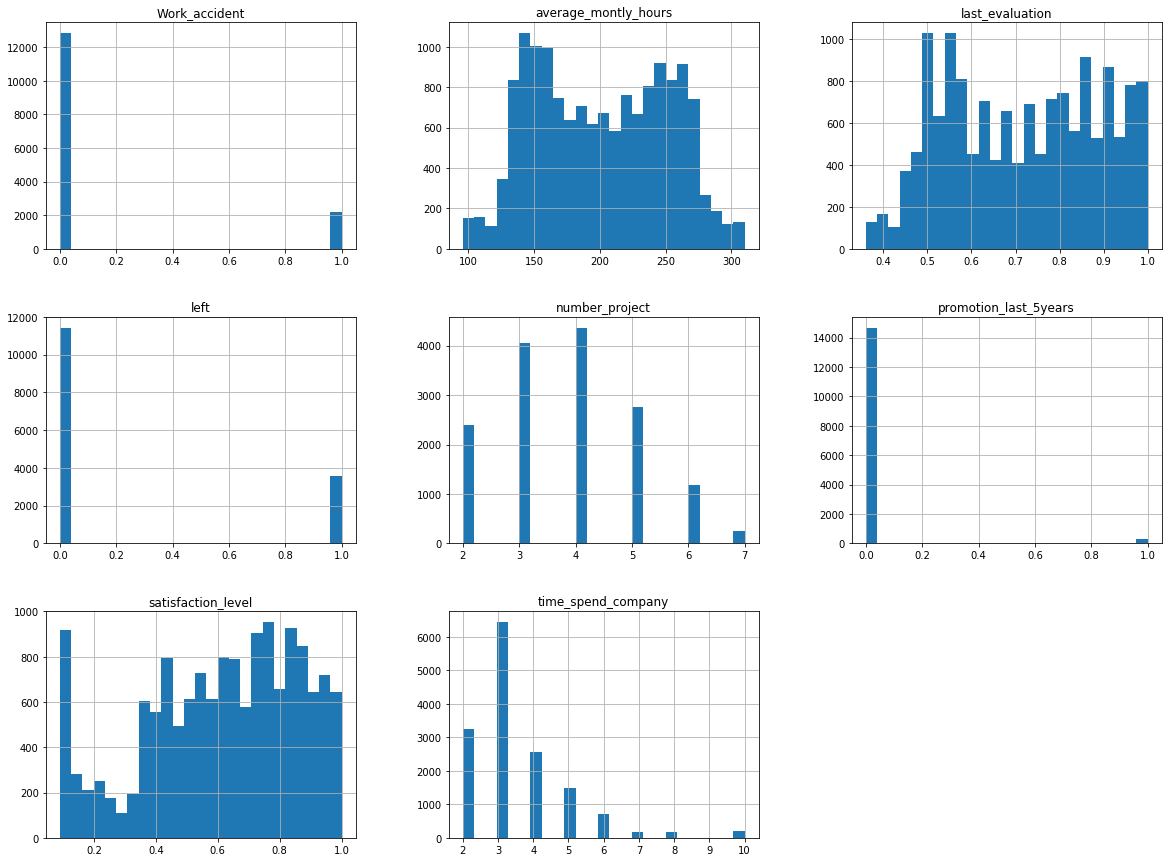

In [7]:
df.hist(bins = 25, figsize = (20,15)) #Check the hist parameters by clicking on the Tab completion. 
plt.show()

#### 2.4. Data manipulations

After we looked on the data we can prepare it to analysis. 

From understanding the histograms, and talking with experts we might decide to drop or change columns, or to split the data by rows. 

For example: 

We can see that only few employees were promoted in last 5 years. Assume that we learn that this is because there are only CEO and employees at this company, and no other levels. 

An option that we will take here to handle this is:
1. Take out the few rows of those who did get promotion last year, and put them aside for separate handling
2. Drop this predictor from data

(Note that after the data manipulation you can rerun the describe or histogram above to see changes)

In [8]:
df_promoted = df[df['promotion_last_5years'] == 1]
df = df[df['promotion_last_5years'] == 0]
df = df.drop('promotion_last_5years', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 14998
Data columns (total 9 columns):
satisfaction_level      14680 non-null float64
last_evaluation         14680 non-null float64
number_project          14680 non-null int64
average_montly_hours    14680 non-null int64
time_spend_company      14680 non-null int64
Work_accident           14680 non-null int64
left                    14680 non-null int64
sales                   14680 non-null object
salary                  14680 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 1.1+ MB


Typically data scientists continue back and forth between diffrent data visualizations and manipulations, but for this exercise we will stop here. We will dive more to this on next lesson.

#### 2.5. Categorical values

Data manipulations require also handling of categorical data, and transforming it to be numerical. In our example, 'work_accident' and 'sales' are categorical that already appear as numerical. However, 'sales' and 'salary' are categorical with non-numeric data. We will learn how to handle such variables on next lesson, for now, lets just remove these columns.

You can learn more on the drop function in pandas, in: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

In [9]:
df = df.drop(columns=['sales','salary'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14680 entries, 0 to 14998
Data columns (total 7 columns):
satisfaction_level      14680 non-null float64
last_evaluation         14680 non-null float64
number_project          14680 non-null int64
average_montly_hours    14680 non-null int64
time_spend_company      14680 non-null int64
Work_accident           14680 non-null int64
left                    14680 non-null int64
dtypes: float64(2), int64(5)
memory usage: 917.5 KB


#### 2.6. Transform the data to matrix of X and y, spliting to Train and Test

Let's now prepae to modeling:
1. Split between X the predictors and y the target
2. Turn from data frame to matrix
3. Split X and y to train data set and test data set, with matching indexes between X and y


In [10]:
# 1. Split between X the predictors and y the target
y = df['left']
X = df.drop('left', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix of size 6 * 14,680
y = y.values  # y is a matrix of size 1 * 14,680, therefore it is a vector

# 3. Split X and y togather to train data set 80% and test data set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify = y) 

The train_test_split is the first function we are using from sklearn.
Learn more about it function on: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 


sklearn handles numpy arrays, whereas until now we handled a dataframe.
Lets check that indeed we changed the type:

In [11]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

df type is:  <class 'pandas.core.frame.DataFrame'>   and X_train type is:  <class 'numpy.ndarray'>


### 3. Fit a model, learning

To fit a model means to train the selected model(s) on X_train and y_train.
Most of this course will be dedicated to modeling fit and evaluation.
Yet, the model fiting itself is very short in programming, because the models are already programed in sklearn.
The programming for fiting a model (learning) includes 2 commands:
1. Select a model
2. Fit command

#### 3.1 Select a model

In this example we will use a model of type tree, that is called decision tree.
We will first import it from sklearn. Note that there is a decision trees for regresssion and a diffrent one for classification.

In [12]:
tree_class = DecisionTreeClassifier()

#### 3.2 Fit the selected model
Training the model, using sklearn, is typically only one command.

In [13]:
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 4. Model evaluation

Evaluating the model can also be done in one command.

We can evalute the model that was trained on train_x by its prediction of test_x compared to test_y in one command. On next lessons we will learn more evaluation methods, as usually decision is taken by combined evaluation scores.

In [14]:
tree_class.score(X=X_test, y=y_test) 

0.9826294277929155

As we can see the evaluation on test was very good. Yet, model score on train is much higher. This may indicate that we might be in an overfit to the train data set.

In [15]:
tree_class.score(X=X_train, y=y_train) 

0.9998297002724795

### 5. Predict / Deploy model
Now that we have a model that we are satisfied it we can run it on new data.

Let's look on 3 employees, lines 7, 8 and 9 from the test data as example for input.

In [16]:
example = X_test[7:10,]
example

array([[1.80e-01, 6.20e-01, 3.00e+00, 1.65e+02, 4.00e+00, 0.00e+00],
       [3.00e-01, 3.70e-01, 6.00e+00, 2.78e+02, 3.00e+00, 0.00e+00],
       [4.00e-01, 5.10e-01, 2.00e+00, 1.39e+02, 3.00e+00, 0.00e+00]])

Can you describe in words employee 7, 8 and 9? Who do you think will leave or stay?

In [17]:
predicted_y = tree_class.predict(X=example)
predicted_y

array([0, 0, 1], dtype=int64)

The prediction is that employee 9 will leave the company and employees 7 and 8 will stay.

We can compare that to the actual in the data, that is same rows in y_test.

In [18]:
y_test[7:10,]

array([0, 0, 1], dtype=int64)

The prediction matched the actual

### 6. Communicate
Now that you have a good working model you need to communicate your results.

If this is a predict project, you may decide not to communicate details externaly, only your evaluation results.

You need to communicate how you got to the results, to customers on infer project, and internaly on predict project. 